In [14]:
%matplotlib inline

In [15]:
import pandas as pd

In [16]:
processed = 'processed'
submissions = 'submissions'
features = 'features'
raw = 'raw'
df_train = pd.read_csv(f'{processed}/train.csv')
df_test =  pd.read_csv(f'{processed}/test.csv')

In [17]:
len(df_train), len(df_test)

(891, 418)

In [18]:
from fastai.tabular import * 

In [19]:
df_train.head(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Name_title_survival_odds,Name_title_is_Master.,Name_title_is_Miss.,Name_title_is_Mr.,Name_title_is_Mrs.,Name_title_is_Other.,Name_last,Name_last_odds_survival,Family_size,Family_is_alone
0,1,0.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,...,0.156673,0,0,1,0,0,Braund,0.0,1,False


In [20]:
df_train.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'src', 'Sex_female', 'Sex_male',
       'Fare_is_na', 'Fare_q_is(-0.001..7.568]', 'Fare_q_is(7.568..7.854]',
       'Fare_q_is(7.854..8.05]', 'Fare_q_is(8.05..10.5]',
       'Fare_q_is(10.5..14.454]', 'Fare_q_is(14.454..21.679]',
       'Fare_q_is(21.679..26.955]', 'Fare_q_is(26.955..41.579]',
       'Fare_q_is(41.579..78.051]', 'Fare_q_is(78.051..512.329]', 'Age_na',
       'Age_is(0..2]', 'Age_is(2..6]', 'Age_is(6..14]', 'Age_is(14..16]',
       'Age_is(16..18]', 'Age_is(18..25]', 'Age_is(25..35]', 'Age_is(35..40]',
       'Age_is(40..45]', 'Age_is(45..60]', 'Age_is(60..80]',
       'Age_q_is(0.169..14.0]', 'Age_q_is(14.0..19.0]', 'Age_q_is(19.0..22.0]',
       'Age_q_is(22.0..25.0]', 'Age_q_is(25.0..28.0]', 'Age_q_is(28.0..31.0]',
       'Age_q_is(31.0..36.0]', 'Age_q_is(36.0..42.0]', 'Age_q_is(42.0..50.0]',
       'Age_q_is(50.0..80.0]', 'Pclass_is_1', 'Pclass_is_

In [21]:
len(df_train)

891

In [22]:
df_train['Survived'] = df_train['Survived'].astype('int')

In [23]:
valid_idx = range(len(df_train)-200, len(df_train))

In [154]:
target_column = 'Survived'
categories = ['Sex', 'Family_is_alone', 'Age_na', 'Embarked', 'Family_size',
             'Name_title_is_Master.', 'Name_title_is_Mr.', 'Name_title_is_Mrs.']
feature_names = categories + ['Age', 'Name_title_survival_odds']
path = './fastai'
procs = [FillMissing, Categorify, Normalize]
data = TabularDataBunch.from_df(path, df_train[feature_names + [target_column]], target_column,
                                valid_idx=valid_idx, procs=procs, cat_names=categories,
                               test_df=df_test[feature_names])

In [155]:
# Note to self: on just a few features this was 0.69, while with more it got to 0.77990
layers = [5, 10, 10, 10, 10, 10, 10, 2]
arch = re.sub(r', ', '_', f'{layers}')
learn = tabular_learner(data, layers=layers, metrics=accuracy)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


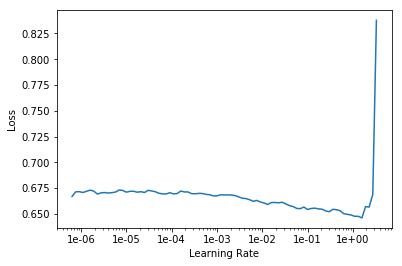

In [156]:
learn.recorder.plot()

In [157]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [158]:
learn.fit_one_cycle(20, 2e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.666428,0.659964,0.630000,00:00
1,0.636307,0.575941,0.630000,00:00
2,0.585913,0.842291,0.785000,00:00
3,0.569433,0.976410,0.805000,00:00
4,0.552562,0.523343,0.840000,00:00
5,0.536443,2.131225,0.705000,00:00
6,0.526978,1.265521,0.825000,00:00
7,0.532360,0.531180,0.815000,00:00
8,0.530481,0.518384,0.630000,00:00
9,0.530067,0.467430,0.815000,00:00


In [159]:
# Note
preds, y_orig = learn.get_preds(DatasetType.Test)

In [160]:
len(preds.unique()), len(preds)

(638, 418)

In [161]:
y_pred = preds.argmax(1)
y_pred

tensor([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [162]:
df_submit = pd.DataFrame({'PassengerId': df_test['PassengerId'], target_column: y_pred})
df_submit.to_csv(f'{submissions}/submission024_{arch}.csv', index=False)

In [163]:
# LB: 0.67, we're overfitting
!head -n3 {submissions}/submission024_{arch}.csv

PassengerId,Survived
892,0
893,1


In [164]:
!open submissions
!open https://www.kaggle.com/c/titanic/submit